# Advanced Lane Finding

The purpose of this code is to calibrate our camera using the 20 chessboard images provided.

A chessboard is used for camera calibration since its regular patterns of high contrast make it easy to detect automatically. So, if we use our camera to take multiple pictures of chessboard agaisnt a flat surface, then we will be able to detect any distortion by looking at the difference between the appartent size and shape of the squares of the chessboard pattern.

We will start by importing all relevant libraries such as opencv, numpy required.

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import natsort
import pickle

## Finding Corners

In this exercise, you'll use the OpenCV functions **findChessboardCorners()** and **drawChessboardCorners()** to automatically find and draw corners in an image of a chessboard pattern.

To learn more about both of those functions, you can have a look at the OpenCV documentation here: [**cv2.findChessboardCorners()**](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.findChessboardCorners) and [**cv2.drawChessboardCorners()**](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.drawChessboardCorners).


## Calibrate Camera Function

In [4]:
def calibrate_camera(nx, ny):
    # function to calibrate the camera over different chessboard images and input the x and y corners

    # get the list of images
    images = glob.glob('camera_cal/calibration*.jpg')

    # sorting the images based on ids
    images = natsort.natsorted(images)
    # images = glob.glob('test_images/test*.jpg')

    # creating arrays to store object and image points from all the images
    objpoints = []      # 3D object points in real space
    imgpoints = []      # 2D points in image space

    # prepare object points
    objp = np.zeros((ny*nx, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)    # x, y cor-ordinates

    # iterate through the images
    for fname in images:

        # read file
        img = cv2.imread(fname)

        # grab the filenames and extensions for saving result files later
        filename_w_ext = os.path.basename(fname)
        filename, file_extension = os.path.splitext(filename_w_ext)

        # convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        # print(ret)

        # If found, we will get image coordinates
        if (ret == True):
            # add the corners and objectpoints to our lists
            imgpoints.append(corners)
            objpoints.append(objp)

            # draw and display the corners
            img_corners = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            # cv2.imshow('img',img_corners)
            # cv2.waitKey(0)

            # save the drawn chessboard corners
            # mpimg.imsave(('output_images/chessboard_corners/'+filename+'-corners'+file_extension), img_corners)
            cv2.imwrite(('output_images/chessboard_corners/'+filename+'-corners'+file_extension), img_corners)

            # calculate and save undistorted images
            ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
            undist = cv2.undistort(img, mtx, dist, None, mtx)
            cv2.imwrite(('output_images/undistorted_chessboard_corners/'+filename+'-undistorted'+file_extension), undist)
        

    # cv2.destroyAllWindows()

    # sample one image for undistortion demo
    
    img = cv2.imread('camera_cal/calibration3.jpg')
    img_size = (img.shape[1], img.shape[0])

    # camera calibration after giving object points and image points

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    cv2.imwrite('output_images/test_undist.jpg',dst)
    
    # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump( dist_pickle, open( "pickle/wide_dist_pickle.p", "wb" ) )
    
    # Visualize undistortion
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)
    
    return mtx, dist

### Call Camera Calibration Function

(array([[1.15777818e+03, 0.00000000e+00, 6.67113857e+02],
        [0.00000000e+00, 1.15282217e+03, 3.86124583e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-0.24688507, -0.02373156, -0.00109831,  0.00035107, -0.00259866]]))

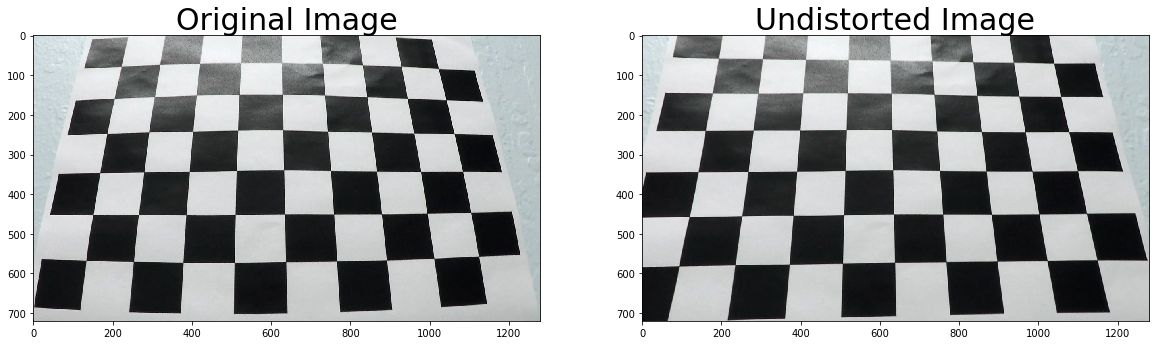

In [5]:
# function call
calibrate_camera(9,6)